<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/ProjectPart6Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 6

##Linear Regression

In [1]:
#Load your packages
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pa


%matplotlib inline

In [2]:
#https://docs.scipy.org/doc/scipy/reference/stats.html

# Time For Data 

In [5]:
data = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Applied_Stats_Jupyter_Notebooks/master/blues.csv') #this file is sitting in a github repository.  I click the raw button to find this link

In [6]:
data

,Rk,Player,From,To,Yrs,Lg,GP,G,A,PTS,+/-,PIM,EV,PP,SH,GW,EV.1,PP.1,SH.1,S,S%,TOI,ATOI
0,1,Bruce Affleck\afflebr01,1975,1979,5,NHL,274,14,65,79,-81,86,10,4,0,2,48,14,3,363,3.9,NaN,NaN
1,2,Kenny Agostino\agostke01,2017,2017,1,NHL,7,1,2,3,0,2,1,0,0,0,1,1,0,17,5.9,89.0,12:47
2,3,Glenn Anderson*\andergl01,1995,1996,2,NHL,51,14,16,30,-2,43,12,2,0,3,13,3,0,89,15.7,NaN,NaN
3,4,Perry Anderson\anderpe01,1982,1985,4,NHL,144,22,18,40,-14,355,22,0,0,2,18,0,0,168,13.1,NaN,NaN
4,5,Ron Anderson\anderro01,1970,1970,1,NHL,59,9,9,18,9,36,8,1,0,0,8,1,0,107,8.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,592,Joe Zanussi\zanusjo01,1977,1977,1,NHL,11,0,3,3,-6,4,0,0,0,0,1,2,0,11,0.0,NaN,NaN
592,593,Peter Zezel\zezelpe01,1989,1997,4,NHL,217,54,105,159,-6,81,39,14,1,9,57,47,1,409,13.2,NaN,NaN
593,594,Mike Zigomanis\zigommi01,2006,2006,1,NHL,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,15.0,7:39
594,595,Rick Zombo\zombori01,1992,1995,4,NHL,232,6,42,48,-6,233,6,0,0,1,36,3,3,161,3.7,NaN,NaN


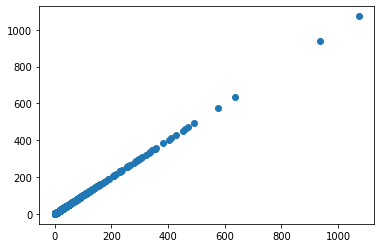

In [7]:
#Let's use something that is perfectly correlated!  Goals+Assists = points so these should be identical
plt.scatter(data["G"]+data["A"],data["PTS"])

In [10]:
#Correlation will be the pearsonr function it also returns your p value
stats.pearsonr(data["G"]+data["A"],data["PTS"])

(1.0, 0.0)

In [9]:
#Let's check that the p value is the same as I showed in class\
r = stats.pearsonr(data["G"]+data["A"],data["PTS"])[0]
n = len(data["G"])
t = r/np.sqrt((1-r**2)/(n-2))
1-stats.t.cdf(t, n-2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


0.0

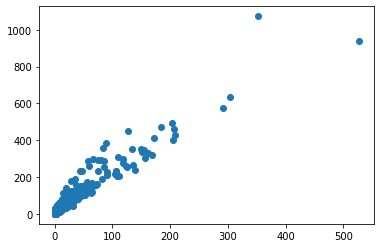

In [8]:
#That one was boring, let's try again. 
plt.scatter(data["G"],data["PTS"])

In [12]:
#Still one heck of a 
stats.pearsonr(data["G"],data["PTS"])

(0.9589718106521393, 0.0)

In [13]:
#Still showing very low p value!
#Let's check that the p value is the same as I showed in class\
r = stats.pearsonr(data["G"],data["PTS"])[0]
n = len(data["G"])
t = r/np.sqrt((1-r**2)/(n-2))
1-stats.t.cdf(t, n-2)

0.0

# Time for Regression Lines

In [15]:
stats.linregress(data["G"],data["PTS"])

LinregressResult(slope=2.2372894572578783, intercept=8.914999455919627, rvalue=0.9589718106521405, pvalue=0.0, stderr=0.027138033947613067)

In [16]:
#Easy right?  Let's make it into something useable too
m = stats.linregress(data["G"],data["PTS"])[0]
b = stats.linregress(data["G"],data["PTS"])[1]
def y(x):
    return(m*x+b)
    


In [17]:
y(3)

15.626867827693262

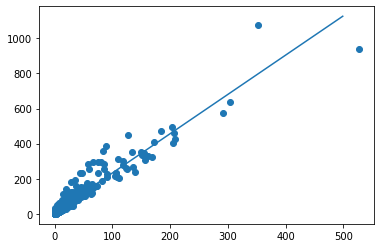

In [19]:
x = np.arange( 0,500,1)
plt.scatter(data["G"],data["PTS"])
plt.plot(x,y(x))

In [20]:
#sum of the residuals
s = 0
for i in range (0,len(data["G"])):
    s = s+y(data["G"][i])-data["PTS"][i]

In [21]:
#Should be zero
s

1.6200374375330284e-12

In [22]:
#Sum of Squares of Residuals
ss = 0
for i in range (0,len(data["G"])):
    ss = ss+(y(data["G"][i])-data["PTS"][i])**2

In [23]:
#This is the thing that is minimized
ss

516693.1634258639